## _*Quantum SVM (variational method)*_

The QSVM_Kernel notebook here demonstrates a kernel based approach. This notebook shows a variational method.

For further information please see: [https://arxiv.org/pdf/1804.11326.pdf](https://arxiv.org/pdf/1804.11326.pdf)


**This notebook shows the SVM implementation based on the variational method.**

In [1]:
from datasets import *
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import get_input_instance
from qiskit_aqua import run_algorithm

First we prepare the dataset, which is used for training, testing and the finally prediction.

*Note: You can easily switch to a different dataset, such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.*

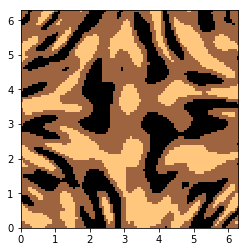

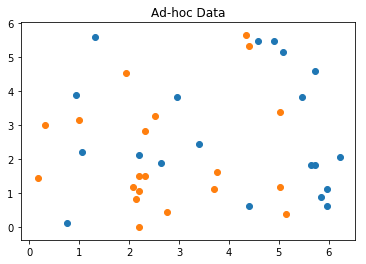

{'A': 0, 'B': 1}


In [2]:
n = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
                                                                     test_size=testing_dataset_size, 
                                                                     n=n, gap=0.3, PLOT_DATA=True)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

With the dataset ready we initialize the necessary inputs for the algorithm:
- the input dictionary (params) 
- the input object containing the dataset info (algo_input).

In [3]:
params = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {'name': 'QSVM.Variational', 'override_SPSA_params': True},
    'backend': {'name': 'qasm_simulator', 'shots': 1024},
    'optimizer': {'name': 'SPSA', 'max_trials': 200, 'save_steps': 1},
    'variational_form': {'name': 'RYRZ', 'depth': 3},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2}
}

algo_input = get_input_instance('SVMInput')
algo_input.training_dataset  = training_input
algo_input.test_dataset = test_input
algo_input.datapoints = datapoints[0]

With everything setup, we can now run the algorithm.

For the testing, the result includes the details and the success ratio.

For the prediction, the result includes the predicted labels. 

In [4]:
result = run_algorithm(params, algo_input)
print("testing success ratio: ", result['testing_accuracy'])
print("predicted classes:", result['predicted_classes'])

testing success ratio:  1.0
predicted classes: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
